# 10.5.2 Policy Gradient Methods

## Explanation of Policy Gradient Methods

Policy Gradient Methods are a class of reinforcement learning algorithms that directly optimize the policy, which is the agent's behavior in the environment. Unlike value-based methods like Q-Learning or DQN, which aim to estimate the value function (i.e., the expected return for a given state-action pair), Policy Gradient Methods focus on finding the optimal policy by adjusting the parameters of the policy itself.

In Policy Gradient Methods, the policy is usually represented as a probability distribution over actions, parameterized by a set of weights. The objective is to maximize the expected return by adjusting these weights using gradient ascent. The gradient of the policy is estimated and used to update the policy parameters in the direction that increases the expected return.

One popular algorithm that utilizes Policy Gradient is the REINFORCE algorithm. It updates the policy based on the return received after following the policy for an episode.

## Scenarios Where Policy Gradient Methods Are Beneficial

### Benefits:
- **Continuous Action Spaces:** Policy Gradient Methods are well-suited for environments with continuous action spaces, where value-based methods struggle.
- **Stochastic Policies:** These methods naturally handle stochastic policies, which can be beneficial in environments where exploration is crucial.
- **End-to-End Optimization:** Policy Gradient Methods optimize the policy directly, allowing for more efficient learning in certain scenarios.

### Use Cases:
- **Robotics:** Learning control policies for robots where actions are continuous.
- **Games:** Situations where the policy needs to be stochastic, such as in multi-agent games.
- **Finance:** Portfolio management with continuous actions and uncertainty.

## Methods for Implementing Policy Gradient Methods

Below is a basic implementation of a Policy Gradient method using TensorFlow and Keras, applied to the CartPole-v1 environment from OpenAI Gym.

___
___
### Readings:
- [Policy Gradients in a Nutshell](https://towardsdatascience.com/policy-gradients-in-a-nutshell-8b72f9743c5d)
- [REINFORCE — a policy-gradient based reinforcement Learning algorithm](https://medium.com/intro-to-artificial-intelligence/reinforce-a-policy-gradient-based-reinforcement-learning-algorithm-84bde440c816)
- [RL — Policy Gradient Explained](https://jonathan-hui.medium.com/rl-policy-gradients-explained-9b13b688b146)
- [RL — Policy Gradients Explained (Part 2)](https://jonathan-hui.medium.com/rl-policy-gradients-explained-advanced-topic-20c2b81a9a8b)
___
___

In [1]:
import gym
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input
import matplotlib.pyplot as plt

In [2]:
# Set up the environment
env = gym.make('CartPole-v1')
state_size = env.observation_space.shape[0]
action_size = env.action_space.n

In [3]:
# Hyperparameters
gamma = 0.99        # Discount factor
learning_rate = 0.01
episodes = 700

In [4]:
# Policy Gradient model 
def build_model():
    model = Sequential([
        Input(shape=(state_size,)),
        Dense(24, activation='relu'),
        Dense(24, activation='relu'),
        Dense(action_size, activation='softmax')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='categorical_crossentropy')
    return model

model = build_model()

In [5]:
def choose_action(state):
    state = np.reshape(state, [1, state_size])
    action_probabilities = model.predict(state, verbose=0)
    return np.random.choice(action_size, p=action_probabilities[0])

def discount_rewards(rewards):
    discounted_rewards = np.zeros_like(rewards)
    cumulative = 0.0
    for i in reversed(range(len(rewards))):
        cumulative = cumulative * gamma + rewards[i]
        discounted_rewards[i] = cumulative
    return discounted_rewards

In [6]:
all_rewards = []
for episode in range(episodes+1):
    state = env.reset()
    state=list(state)[0]
    states, actions, rewards = [], [], []
    done = False
    while not done:
        action = choose_action(state)
        next_state, reward, done, _,_ = env.step(action)
        states.append(state)
        action_onehot = np.zeros(action_size)
        action_onehot[action] = 1
        actions.append(action_onehot)
        rewards.append(reward)
        state = next_state
        if done:
            all_rewards.append(np.sum(rewards))
            discounted_rewards = discount_rewards(rewards)
            states = np.array(states)
            actions = np.array(actions)
            model.fit(states, actions, sample_weight=discounted_rewards, verbose=0)
            if episode % 100==0:
                print(f"Episode: {episode+1}/{episodes}, Total Reward: {np.sum(rewards)}")

C:\Users\Aditya Arya\AppData\Local\Programs\Python\Python312\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Episode: 1/700, Total Reward: 25.0
Episode: 101/700, Total Reward: 34.0
Episode: 201/700, Total Reward: 94.0
Episode: 301/700, Total Reward: 35.0
Episode: 401/700, Total Reward: 37.0
Episode: 501/700, Total Reward: 94.0
Episode: 601/700, Total Reward: 9.0
Episode: 701/700, Total Reward: 15.0


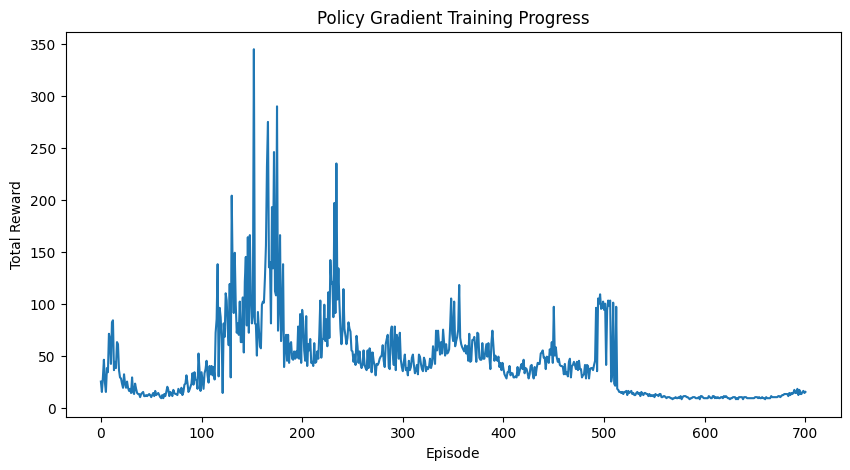

In [7]:
# Visualization of Results
plt.figure(figsize=(10, 5))
plt.plot(all_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Policy Gradient Training Progress')
plt.show()

## Conclusion
Policy Gradient Methods are powerful tools in reinforcement learning, particularly when dealing with environments that have continuous action spaces or require stochastic policies. By directly optimizing the policy, these methods allow for more flexibility and efficiency in certain scenarios. The example provided demonstrates the implementation of a basic Policy Gradient algorithm applied to the CartPole-v1 environment, showcasing the ability to learn and improve over episodes.